In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('/content/movies.csv')
df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
df.shape

(62423, 3)

In [ ]:
df.drop(['genres'],axis=1,inplace=True)

In [ ]:

rating = pd.read_csv('/content/ratings.csv')

rating.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [ ]:
rating = rating.loc[:,["userId","movieId","rating"]]
rating.head()

,userId,movieId,rating
0,1,296.0,5.0
1,1,306.0,3.5
2,1,307.0,5.0
3,1,665.0,5.0
4,1,899.0,3.5


In [ ]:
df = pd.merge(df,rating)

In [ ]:
df.head()

,movieId,title,userId,rating
0,1,Toy Story (1995),2,3.5
1,1,Toy Story (1995),3,4.0
2,1,Toy Story (1995),4,3.0
3,1,Toy Story (1995),5,4.0
4,1,Toy Story (1995),8,4.0


In [ ]:
df.shape



(1144699, 4)

In [ ]:
df = df.iloc[:1000000]

In [ ]:
df.shape

(1000000, 4)

In [ ]:
df.describe()

,movieId,userId,rating
count,1000000.000000,1000000.000000,1000000.000000
mean,8071.220820,3783.834413,3.542331
std,15697.694823,2093.280577,1.057576
min,1.000000,1.000000,0.500000
25%,924.000000,1991.000000,3.000000
50%,2329.000000,3895.000000,4.000000
75%,5040.000000,5508.000000,4.000000
max,69481.000000,7446.000000,5.000000


In [ ]:
df.groupby("title").mean()['rating'].sort_values(ascending=False)

,rating
title,
"Town is Quiet, The (Ville est tranquille, La) (2000)",5.0
Johnny Tremain (1957),5.0
Africa addio (1966),5.0
Phish: Bittersweet Motel (2000),5.0
G.O.R.A. (2004),5.0
...,...
In the Mirror of Maya Deren (Im Spiegel der Maya Deren) (2002),0.5
Anthony Adverse (1936),0.5
Lan Yu (2001),0.5


In [ ]:
df.groupby("title").count()["rating"].sort_values(ascending=False)

,rating
title,
Forrest Gump (1994),3846
"Shawshank Redemption, The (1994)",3793
Pulp Fiction (1994),3737
"Silence of the Lambs, The (1991)",3538
"Matrix, The (1999)",3367
...,...
"Ogre, The (Unhold, Der) (1996)",1
To Each His Own (1946),1
Full Speed (À toute vitesse) (1996),1


In [ ]:
ratings=pd.DataFrame(df.groupby("title").mean()['rating'])
ratings['number of ratings']=pd.DataFrame(df.groupby("title").count()["rating"])
print(ratings.head())

                                    rating  number of ratings
title                                                        
"Great Performances" Cats (1998)  3.541667                 12
'Round Midnight (1986)            4.125000                  8
'Salem's Lot (2004)               3.550000                 10
'Til There Was You (1997)         3.025000                 20
'burbs, The (1989)                3.138889                144


In [ ]:
ratings.sort_values(by='rating', ascending=False)

,rating,number of ratings
title,,
"Town is Quiet, The (Ville est tranquille, La) (2000)",5.0,1
Johnny Tremain (1957),5.0,1
Africa addio (1966),5.0,1
Phish: Bittersweet Motel (2000),5.0,2
G.O.R.A. (2004),5.0,2
...,...,...
In the Mirror of Maya Deren (Im Spiegel der Maya Deren) (2002),0.5,1
Anthony Adverse (1936),0.5,1
Lan Yu (2001),0.5,2


In [ ]:
ratings.describe()

,rating,number of ratings
count,11459.000000,11459.000000
mean,3.244293,87.267650
std,0.695706,243.578879
min,0.500000,1.000000
25%,2.895118,3.000000
50%,3.354497,11.000000
75%,3.740000,54.000000
max,5.000000,3846.000000


<function matplotlib.pyplot.show(close=None, block=None)>

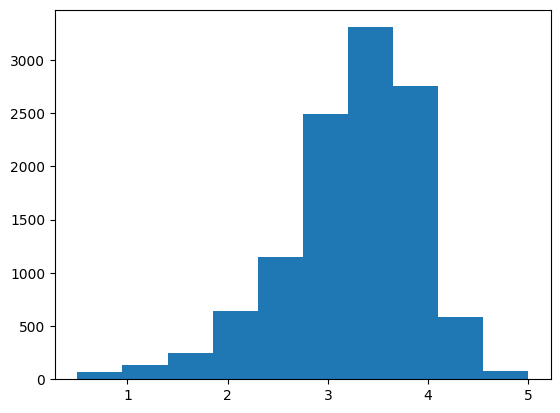

In [ ]:
plt.hist(ratings['rating'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

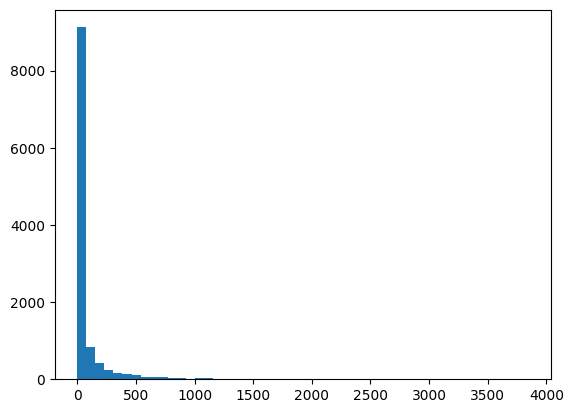

In [ ]:
plt.hist(ratings['number of ratings'],bins=50)
plt.show

In [ ]:
pivot_table = df.pivot_table(index = ["userId"],columns = ["title"],values = "rating")
pivot_table.head(10)


title,"""Great Performances"" Cats (1998)",'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),*batteries not included (1987),...All the Marbles (1981),...And God Spoke (1993),...And Justice for All (1979),...,Zuzu Angel (2006),[REC] (2007),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nos amours (1983),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pivot_table.shape

(7445, 11459)

In [ ]:
def recommend_movie(movie):
    movie_watched = pivot_table[movie]
    similarity_with_other_movies = pivot_table.corrwith(movie_watched)
    similarity_with_other_movies = similarity_with_other_movies.sort_values(ascending=False)
    return similarity_with_other_movies.head()

In [ ]:
recommend_movie('American President, The (1995)')

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,0
title,
À nous la liberté (Freedom for Us) (1931),1.0
"Tango Lesson, The (1997)",1.0
"Gospel According to St. Matthew, The (Vangelo secondo Matteo, Il) (1964)",1.0
"Nasty Girl, The (schreckliche Mädchen, Das) (1990)",1.0
Thief of Hearts (1984),1.0


In [ ]:
recommend_movie('Taxi Driver (1976)')

,0
title,
Waterloo (1970),1.0
Map of the Human Heart (1993),1.0
"Trials of Henry Kissinger, The (2002)",1.0
"Little Indian, Big City (Un indien dans la ville) (1994)",1.0
Little Lord Fauntleroy (1936),1.0
